# Análise preditiva teste - Dataset Bruto

In [1]:
# Imports

import os
import subprocess
import stat
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
#sns.set(style='white')
import matplotlib.pyplot as plt

%matplotlib inline

import datetime
from datetime import datetime
from datetime import time
from datetime import date

In [2]:
testedf = pd.read_excel('Plancopy.xlsx')
testedf.head()

id  qt_hit  diasnav  notlidas  visita_capa usou_app     perfil genero  \
0  3321       0        0         0            0      NAO  ASSINANTE      F   
1  1459       1       23         0          362      SIM  ASSINANTE      M   
2  1630       5       16        11            4      NAO  ASSINANTE      M   
3   905       9       13         8           25      SIM  ASSINANTE      F   
4  1219       1        1         0            9      SIM  ASSINANTE      M   

               dt_nasc           renda  
0  23.04.1981 00:00:00  DE 4SM ATE 8SM  
1  01.01.1900 00:00:00  DE 3SM ATE 4SM  
2  01.01.1900 00:00:00      não possui  
3  01.01.1900 00:00:00   ACIMA DE 25SM  
4  16.08.1977 00:00:00  DE 4SM ATE 8SM

In [3]:
testedf.dtypes

id              int64
qt_hit          int64
diasnav         int64
notlidas        int64
visita_capa     int64
usou_app       object
perfil         object
genero         object
dt_nasc        object
renda          object
dtype: object

In [4]:
testedf['nasc'] = pd.to_datetime(testedf['dt_nasc'], errors='coerce')

In [5]:
testedf['idade'] = date.today().year - testedf['nasc'].dt.year

In [6]:
testedf.head(2)

id  qt_hit  diasnav  notlidas  visita_capa usou_app     perfil genero  \
0  3321       0        0         0            0      NAO  ASSINANTE      F   
1  1459       1       23         0          362      SIM  ASSINANTE      M   

               dt_nasc           renda       nasc  idade  
0  23.04.1981 00:00:00  DE 4SM ATE 8SM 1981-04-23   38.0  
1  01.01.1900 00:00:00  DE 3SM ATE 4SM 1900-01-01  119.0

In [7]:
df1 = testedf[['id', 'qt_hit', 'diasnav','notlidas', 'visita_capa', 'idade', 'genero', 'usou_app', 'renda' ,'perfil']]

In [8]:
df1.head(2)

id  qt_hit  diasnav  notlidas  visita_capa  idade genero usou_app  \
0  3321       0        0         0            0   38.0      F      NAO   
1  1459       1       23         0          362  119.0      M      SIM   

            renda     perfil  
0  DE 4SM ATE 8SM  ASSINANTE  
1  DE 3SM ATE 4SM  ASSINANTE

# Observação: possível dataset sem renda, usou_app

In [9]:
dfnew = testedf[['id', 'qt_hit', 'diasnav', 'notlidas', 'visita_capa', 'idade', 'genero', 'perfil']]

In [10]:
dfnew.head(2)

id  qt_hit  diasnav  notlidas  visita_capa  idade genero     perfil
0  3321       0        0         0            0   38.0      F  ASSINANTE
1  1459       1       23         0          362  119.0      M  ASSINANTE

## Fim da observação

# Início modelo preditivo

## Dataset sem filtro (bruto)

In [11]:
df1.shape

(5600, 10)

In [12]:
# Verificando se existem valores nulos
df1.isnull().values.any()

True

In [13]:
df1.isnull().sum()

id              0
qt_hit          0
diasnav         0
notlidas        0
visita_capa     0
idade          10
genero          0
usou_app        0
renda           0
perfil          0
dtype: int64

In [14]:
df2 = df1.dropna()
df2.head(2)

id  qt_hit  diasnav  notlidas  visita_capa  idade genero usou_app  \
0  3321       0        0         0            0   38.0      F      NAO   
1  1459       1       23         0          362  119.0      M      SIM   

            renda     perfil  
0  DE 4SM ATE 8SM  ASSINANTE  
1  DE 3SM ATE 4SM  ASSINANTE

In [15]:
df2.shape

(5590, 10)

In [16]:
df2.isnull().values.any()

False

In [17]:
df2.dtypes

id               int64
qt_hit           int64
diasnav          int64
notlidas         int64
visita_capa      int64
idade          float64
genero          object
usou_app        object
renda           object
perfil          object
dtype: object

In [18]:
# Trannsformando a coluna perfil em booleano
p = {'ASSINANTE': True, 'PROSPECT': False}
u = {'SIM': True, 'NAO': False}
g = {'M': True, 'F': False}

In [19]:
df2['perfil'] = df2['perfil'].map(p)
df2['usou_app'] = df2['usou_app'].map(u)
df2['genero'] = df2['genero'].map(g)

C:\Users\Resende\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Resende\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Resende\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [20]:
df2.head(2)

id  qt_hit  diasnav  notlidas  visita_capa  idade genero  usou_app  \
0  3321       0        0         0            0   38.0  False     False   
1  1459       1       23         0          362  119.0   True      True   

            renda perfil  
0  DE 4SM ATE 8SM   True  
1  DE 3SM ATE 4SM   True

In [21]:
df2.isnull().sum()

id                0
qt_hit            0
diasnav           0
notlidas          0
visita_capa       0
idade             0
genero          136
usou_app          0
renda             0
perfil         4990
dtype: int64

In [22]:
df2copy = df2.copy()
df3 = df2copy.fillna({
    'genero': False,
    'perfil': False
})
df3

id  qt_hit  diasnav  notlidas  visita_capa  idade  genero  usou_app  \
0       3321       0        0         0            0   38.0   False     False   
1       1459       1       23         0          362  119.0    True      True   
2       1630       5       16        11            4  119.0    True     False   
3        905       9       13         8           25  119.0   False      True   
4       1219       1        1         0            9   42.0    True      True   
5       2645       1        6         3            7   52.0    True     False   
6        842      11       16        10            0   49.0    True     False   
7       3474       0        0         0            0  119.0   False     False   
8        187       0        0         0            0  119.0   False     False   
9       3218       0        0         0            0  119.0    True     False   
10      3167       0        0         0            0  119.0    True     False   
11      2607       0        0         0            0  119.0   False     False   
12       935       0        0         0            0  119.0    True     False   
13      3081       4        4         0           20  119.0    True      True   
14      3561      24       49         0          295  119.0    True      True   
15      1918       0        0         0            0  119.0    True     False   
16        96       0        0         0            0  119.0   False     False   
17       174       0        6         2            0  119.0   False     False   
18       630       1       19        14           18  119.0   False     False   
19      1729       0        0         0            0   30.0    True     False   
20      2282       0        0         0            0  119.0    True     False   
21       961       0        0         0            0  119.0    True     False   
22      2135       0        0         0            0  119.0    True     False   
23      2619       0        2         0            7  119.0    True      True   
24      2713      14       37        51           54  119.0    True      True   
25      2621       0        0         0            0   44.0   False     False   
26      2617       0        0         0            0  119.0   False     False   
27      1452       7        1         0            0   53.0   False     False   
28      2469       0        0         0            0  119.0    True     False   
29      3593       0        0         0            0  119.0   False     False   
...      ...     ...      ...       ...          ...    ...     ...       ...   
5570  302844       1        1         0            0   49.0    True     False   
5571  108026       0       14        13            1   49.0    True     False   
5572  224708       0        2         1            0   49.0   False     False   
5573   95375       0        1         1            0   49.0    True     False   
5574  274853       0        1         3            0   59.0    True     False   
5575  177216       0        6         3            0   23.0   False     False   
5576   75145       0        3         1            0   49.0   False     False   
5577  329457       0       22        33            0   49.0    True     False   
5578  306667       0        8         9            1   49.0   False     False   
5579   21141       1        6         8            0   49.0   False     False   
5580  189942       0        6         9            0   49.0   False     False   
5581  364097       3        4         7            0   49.0   False     False   
5582  142028       5       11         8            0   49.0    True     False   
5583  232110       0        3         2            0   49.0    True     False   
5584  352424       0       15        16            0   49.0    True     False   
5585  112454       0        3         4            0   49.0    True     False   
5586  135941       1        2         3            0   49.0   False     False   
5587  325262      26       22        48  

In [23]:
df3.shape

(5590, 10)

In [24]:
len(df3.loc[df3['perfil'] == True])

600

In [25]:
len(df3.loc[df3['perfil'] == False])

4990

# Verificando a correlação entre os atributos

## Dataset sem filtro (bruto)

In [26]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
df3.corr()

id    qt_hit   diasnav  notlidas  visita_capa     idade  \
id           1.000000 -0.004106  0.019052 -0.014108     0.007825 -0.395799   
qt_hit      -0.004106  1.000000  0.401866  0.049497     0.324415  0.030324   
diasnav      0.019052  0.401866  1.000000  0.505616     0.621880 -0.021463   
notlidas    -0.014108  0.049497  0.505616  1.000000     0.505728  0.002333   
visita_capa  0.007825  0.324415  0.621880  0.505728     1.000000  0.016683   
idade       -0.395799  0.030324 -0.021463  0.002333     0.016683  1.000000   
genero      -0.049148  0.062392  0.135948  0.007213     0.071687  0.088139   
usou_app     0.004670  0.188668  0.457095  0.188590     0.442490 -0.003048   
perfil      -0.488037  0.022210 -0.036064  0.013929     0.003556  0.816646   

               genero  usou_app    perfil  
id          -0.049148  0.004670 -0.488037  
qt_hit       0.062392  0.188668  0.022210  
diasnav      0.135948  0.457095 -0.036064  
notlidas     0.007213  0.188590  0.013929  
visita_capa  0.071687  0.442490  0.003556  
idade        0.088139 -0.003048  0.816646  
genero       1.000000  0.147089  0.101751  
usou_app     0.147089  1.000000 -0.022888  
perfil       0.101751 -0.022888  1.000000

In [27]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df3, size=10):
    corr = df3.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

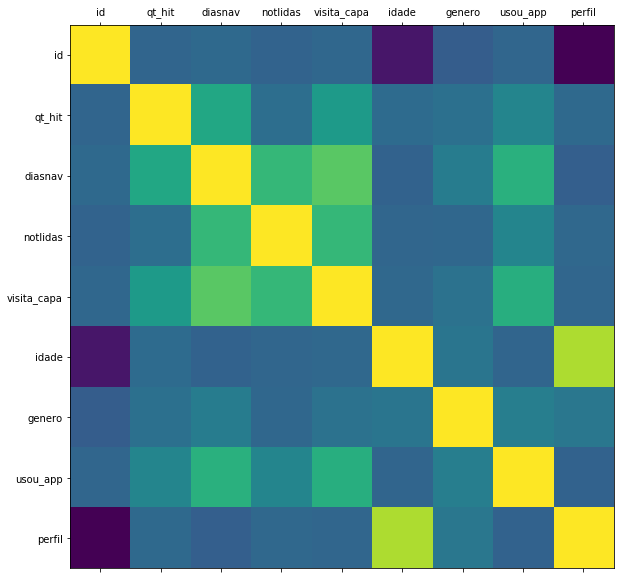

In [28]:
# Criando o gráfico
plot_corr(df3)

In [29]:
# Definindo as classes
perfil_map = {True : 1, False : 0}
usou_app_map = {True : 1, False : 0}
genero_map = {True : 1, False : 0}

In [30]:
# Aplicando o mapeamento ao dataset
df3['perfil'] = df3['perfil'].map(perfil_map)
df3['usou_app'] = df3['usou_app'].map(usou_app_map)
df3['genero'] = df3['genero'].map(genero_map)

In [31]:
# Verificando como os dados estão distribuídos
num_true = len(df3.loc[df3['perfil'] == True])
num_false = len(df3.loc[df3['perfil'] == False])
print("Número de assinantes: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de não assinantes: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de assinantes: 600 (10.73%)
Número de não assinantes: 4990 (89.27%)


In [32]:
# os números de assinantes não estão muito bem distribuídos

# fatiando o dataset a fim de distrubiuir melhor os dados

In [33]:
df4 = df3.iloc[2000:4000]
df4.head(2)

id  qt_hit  diasnav  notlidas  visita_capa  idade  genero  usou_app  \
2004  240976       1        2         0            7   49.0       0         1   
2005  136834       0       60         2          202   49.0       1         0   

           renda  perfil  
2004  não possui       0  
2005  não possui       0

In [34]:
len(df4.loc[df4['perfil'] == 0])

2000

In [35]:
len(df4.loc[df4['perfil'] == 1])

0

In [36]:
df5 = df3.iloc[0:3000]
df5.head(2)

id  qt_hit  diasnav  notlidas  visita_capa  idade  genero  usou_app  \
0  3321       0        0         0            0   38.0       0         0   
1  1459       1       23         0          362  119.0       1         1   

            renda  perfil  
0  DE 4SM ATE 8SM       1  
1  DE 3SM ATE 4SM       1

In [37]:
len(df5.loc[df5['perfil'] == 0])

2400

In [38]:
len(df5.loc[df5['perfil'] == 1])

600

In [39]:
df6 = df3.iloc[0:2000]
df6.head(2)

id  qt_hit  diasnav  notlidas  visita_capa  idade  genero  usou_app  \
0  3321       0        0         0            0   38.0       0         0   
1  1459       1       23         0          362  119.0       1         1   

            renda  perfil  
0  DE 4SM ATE 8SM       1  
1  DE 3SM ATE 4SM       1

In [40]:
len(df6.loc[df6['perfil'] == 0])

1400

In [41]:
len(df6.loc[df6['perfil'] == 1])

600

In [42]:
# Verificando como os dados estão distribuídos
n_true = len(df6.loc[df6['perfil'] == True])
n_false = len(df6.loc[df6['perfil'] == False])
print("Número de assinantes: {0} ({1:2.2f}%)".format(n_true, (n_true/ (n_true + n_false)) * 100))
print("Número de não assinantes: {0} ({1:2.2f}%)".format(n_false, (n_false/ (n_true + n_false)) * 100))

Número de assinantes: 600 (30.00%)
Número de não assinantes: 1400 (70.00%)


# Spliting

## Inserir a imagem do spliting chamadotreinamento

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['qt_hit', 'diasnav', 'notlidas', 'visita_capa', 'idade', 'genero', 'usou_app', 'perfil']

In [45]:
# Variável a ser prevista
atrib_prev = ['perfil']

In [46]:
# Criando objetos
X = df6[atributos].values
Y = df6[atrib_prev].values

In [47]:
X

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1., 23.,  0., ...,  1.,  1.,  1.],
       [ 5., 16., 11., ...,  1.,  0.,  1.],
       ...,
       [12., 13., 41., ...,  1.,  0.,  0.],
       [ 0.,  2.,  0., ...,  1.,  1.,  0.],
       [ 0.,  2.,  0., ...,  1.,  0.,  0.]])

In [48]:
Y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [49]:
# Definindo a taxa de split
split_test_size = 0.30

In [50]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [51]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df6.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df6.index)) * 100))

70.00% nos dados de treino
30.00% nos dados de teste


In [52]:
X_treino

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       ...,
       [ 5., 16., 12., ...,  1.,  1.,  0.],
       [ 0.,  1.,  1., ...,  1.,  0.,  0.],
       [ 0.,  3.,  1., ...,  1.,  0.,  0.]])

# Verificando o split

In [53]:
print("Original True : {0} ({1:0.2f}%)".format(len(df6.loc[df6['perfil'] == 1]), 
                                               (len(df6.loc[df6['perfil'] ==1])/len(df6.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df6.loc[df6['perfil'] == 0]), 
                                               (len(df6.loc[df6['perfil'] == 0])/len(df6.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True : 600 (30.00%)
Original False : 1400 (70.00%)

Training True : 407 (29.07%)
Training False : 993 (70.93%)

Test True : 193 (32.17%)
Test False : 407 (67.83%)


In [80]:
# Valores Missing ocultos

In [81]:
df6.isnull().values.any()

False

In [82]:
df6.head()

id  qt_hit  diasnav  notlidas  visita_capa  idade  genero  usou_app  \
0  3321       0        0         0            0   38.0       0         0   
1  1459       1       23         0          362  119.0       1         1   
2  1630       5       16        11            4  119.0       1         0   
3   905       9       13         8           25  119.0       0         1   
4  1219       1        1         0            9   42.0       1         1   

            renda  perfil  
0  DE 4SM ATE 8SM       1  
1  DE 3SM ATE 4SM       1  
2      não possui       1  
3   ACIMA DE 25SM       1  
4  DE 4SM ATE 8SM       1

In [83]:
# O zero não é um valor missing.
# Será que o zero representa uma informação correta sobre as variáveis?
# No caso dos atributos sobre qt_hit, diasnav, notlidas, visita_capa, o zero não tornaria os
# dados tendenciosos.

# Atenção com os valores zero e um em genero e usou_app

In [84]:
# Verificar a quantidade de valores zero que há no dataset


In [85]:
# Na análise exploratória do dataset, verificou-se que a moda de valores sobre os atributos
# destacados antariormente. Assim, optou-se por substituir pela média.

In [86]:
# Valores Missing Ocultos

## Dataset fsem filtro (bruto)

In [87]:
# Verificando se existem valores nulos
df6.isnull().values.any()

False

In [88]:
df6.head(5)

id  qt_hit  diasnav  notlidas  visita_capa  idade  genero  usou_app  \
0  3321       0        0         0            0   38.0       0         0   
1  1459       1       23         0          362  119.0       1         1   
2  1630       5       16        11            4  119.0       1         0   
3   905       9       13         8           25  119.0       0         1   
4  1219       1        1         0            9   42.0       1         1   

            renda  perfil  
0  DE 4SM ATE 8SM       1  
1  DE 3SM ATE 4SM       1  
2      não possui       1  
3   ACIMA DE 25SM       1  
4  DE 4SM ATE 8SM       1

In [89]:
print("# Linhas no dataframe {0}".format(len(df6)))
print("# Linhas missing qt_hit: {0}".format(len(df6.loc[df6['qt_hit'] == 0])))
print("# Linhas missing diasnav: {0}".format(len(df6.loc[df6['diasnav'] == 0])))
print("# Linhas missing notlidas: {0}".format(len(df6.loc[df6['notlidas'] == 0])))
print("# Linhas missing visita_capa: {0}".format(len(df6.loc[df6['visita_capa'] == 0])))
print("# Linhas missing idade: {0}".format(len(df6.loc[df6['idade'] == 0])))

# Linhas no dataframe 2000
# Linhas missing qt_hit: 1247
# Linhas missing diasnav: 307
# Linhas missing notlidas: 657
# Linhas missing visita_capa: 1247
# Linhas missing idade: 0


In [90]:
## Tratando Dados Missing - Impute 
# Substituindo os valores iguais a zero, pela média dos dados

In [91]:
from sklearn.preprocessing import Imputer

In [92]:
# Criando objeto
preenche_0 = Imputer(missing_values = 0, strategy = "mean", axis = 0)

# Substituindo os valores iguais a zero, pela média dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

In [93]:
X_treino

array([[19.41977612,  1.        , 27.42963753, ...,  1.        ,
         1.        ,  1.        ],
       [19.41977612, 13.31787521, 27.42963753, ...,  1.        ,
         1.        ,  1.        ],
       [19.41977612, 13.31787521, 27.42963753, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 5.        , 16.        , 12.        , ...,  1.        ,
         1.        ,  1.        ],
       [19.41977612,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [19.41977612,  3.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

# Contruindo e treinando o modelo

In [94]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [95]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [96]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB(priors=None)

# Verificando a exatidão no modelo nos dados de treino

In [97]:
from sklearn import metrics

In [98]:
nb_predict_train = modelo_v1.predict(X_treino)

In [99]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

Exatidão (Accuracy): 0.9400



# Verificando a exatidão no modelo nos dados de teste

In [100]:
nb_predict_test = modelo_v1.predict(X_teste)

In [101]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))
print()

Exatidão (Accuracy): 0.9317



# Métricas

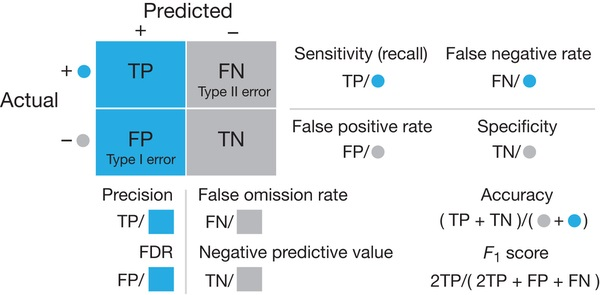

In [102]:
from IPython.display import Image
Image('ConfusionMatrix.jpg')

In [103]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[166  27]
 [ 14 393]]

Classification Report
             precision    recall  f1-score   support

          1       0.92      0.86      0.89       193
          0       0.94      0.97      0.95       407

avg / total       0.93      0.93      0.93       600



In [104]:
# Será que podemos melhorar o algoritmo?

# Testando outro algoritmo

In [105]:
# conjunto de árvorede decisão = random forest

# Otimizando o modelo com RandomForest

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [108]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Exatidão (Accuracy): 0.9936


In [109]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()

Exatidão (Accuracy): 0.9383



In [110]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[161  32]
 [  5 402]]

Classification Report
             precision    recall  f1-score   support

          1       0.97      0.83      0.90       193
          0       0.93      0.99      0.96       407

avg / total       0.94      0.94      0.94       600



# Testando outro algoritmo

In [111]:
# Regressão logística
# é um algoritmo de classificação diferente de regressão linear simples

# Regressão Logística

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo_v3.predict(X_teste)

In [114]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.9400

Classification Report
             precision    recall  f1-score   support

          1       0.95      0.85      0.90       193
          0       0.93      0.98      0.96       407

avg / total       0.94      0.94      0.94       600



In [115]:
### Resumindo
## Exatidão nos dados de teste

# Modelo usando algoritmo Naive Bayes         = 0.93
# Modelo usando algoritmo Random Forest       = 0.94
# Modelo usando algoritmo Regressão Logística = 0.94

In [116]:
## Escolheu-se a regressão logística para realizar previsões

# Fazendo previsões com o modelo treinado

In [117]:
import pickle

In [118]:
# Salvando o modelo para usar mais tarde
filename = 'modelo_treinado_v3.sav'
pickle.dump(modelo_v3, open(filename, 'wb'))

In [123]:
type(X_teste)

numpy.ndarray

In [127]:
len(X_teste)

600

In [139]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[15].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[20].reshape(1, -1))
resultado3 = loaded_model.predict(X_teste[25].reshape(1, -1))
resultado4 = loaded_model.predict(X_teste[30].reshape(1, -1))
resultado5 = loaded_model.predict(X_teste[35].reshape(1, -1))
resultado6 = loaded_model.predict(X_teste[40].reshape(1, -1))
resultado7 = loaded_model.predict(X_teste[45].reshape(1, -1))
resultado8 = loaded_model.predict(X_teste[50].reshape(1, -1))
resultado9 = loaded_model.predict(X_teste[55].reshape(1, -1))
resultado10 = loaded_model.predict(X_teste[60].reshape(1, -1))
print(resultado1)
print(resultado2)
print(resultado3)
print(resultado4)
print(resultado5)
print(resultado6)
print(resultado7)
print(resultado8)
print(resultado9)
print(resultado10)

[1]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[0]
[0]


In [124]:
print(X_teste[15]) # Assinante

[ 47.  40.  50.  29. 119.   1.   1.   1.]


In [129]:
print(X_teste[20]) # Não assinante

[14. 15.  4.  1. 49.  1.  1.  1.]


In [131]:
print(X_teste[25]) # Assinante

[ 15.          18.          29.82962963  54.         119.
   1.           1.           1.        ]


In [132]:
print(X_teste[30]) # Não assinante

[ 17.26728111   1.          29.82962963 114.21461187  49.
   1.           1.           1.        ]


In [134]:
print(X_teste[35]) # Assinante

[ 17.26728111   6.           9.           5.         119.
   1.           1.           1.        ]


In [135]:
print(X_teste[40]) # Assinante

[ 17.26728111  13.78500986  29.82962963 114.21461187 119.
   1.           1.           1.        ]


In [137]:
print(X_teste[45]) # Não assinante

[17.26728111  5.          1.          3.         31.          1.
  1.          1.        ]


In [138]:
print(X_teste[50]) # Não assinante

[17.26728111  6.          2.          4.         36.          1.
  1.          1.        ]


In [140]:
print(X_teste[55]) # Não assinante

[ 17.26728111   1.           3.         114.21461187  49.
   1.           1.           1.        ]


In [141]:
print(X_teste[60]) # Não assinante

[ 30.          48.          29.82962963 263.          49.
   1.           1.           1.        ]


In [145]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
loaded_model = pickle.load(open(filename, 'rb'))
resultado11 = loaded_model.predict(X_teste[215].reshape(1, -1))
resultado12 = loaded_model.predict(X_teste[220].reshape(1, -1))
resultado13 = loaded_model.predict(X_teste[225].reshape(1, -1))
resultado14 = loaded_model.predict(X_teste[230].reshape(1, -1))
resultado15 = loaded_model.predict(X_teste[235].reshape(1, -1))
resultado16 = loaded_model.predict(X_teste[240].reshape(1, -1))
resultado17 = loaded_model.predict(X_teste[245].reshape(1, -1))
resultado18 = loaded_model.predict(X_teste[250].reshape(1, -1))
resultado19 = loaded_model.predict(X_teste[255].reshape(1, -1))
resultado20 = loaded_model.predict(X_teste[260].reshape(1, -1))
print(resultado11)
print(resultado12)
print(resultado13)
print(resultado14)
print(resultado15)
print(resultado16)
print(resultado17)
print(resultado18)
print(resultado19)
print(resultado20)

[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]


In [146]:
print(X_teste[215]) # Não assinante

[ 17.26728111   2.           1.         114.21461187  49.
   1.           1.           1.        ]
